In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/home/auro2677/Desktop/100daysofML/linear_regression/test.csv', index_col=False)

In [5]:
df.head()



,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [6]:
df.shape

(300, 2)

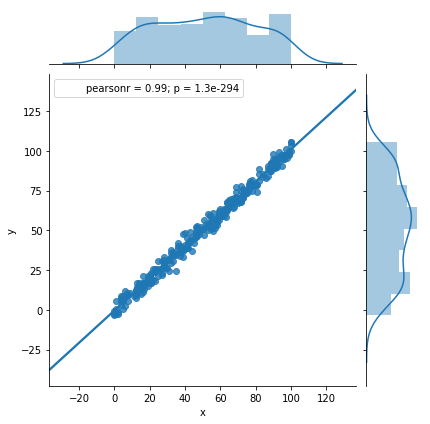

In [8]:
sns.jointplot(x=df['x'], y=df['y'], data=df, kind='reg')

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df['x'], df['y'], test_size=0.2, random_state=42)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (240, 1)
Test - Predictors shape (60, 1)
Train - Target shape (240, 1)
Test - Target shape (60, 1)


/home/auro2677/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [ ]:
Linear Regression using Scikit¶


In [13]:
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
prediction = cls.predict(x_test)

In [15]:
#Parameters used for the model 
cls.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [16]:
print('Co-efficient of linear regression',cls.coef_)


Co-efficient of linear regression [[ 1.01349468]]


In [17]:
print('Intercept of linear regression model',cls.intercept_)


Intercept of linear regression model [-0.36186074]


In [18]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))


Mean Square Error 9.25941097863


In [19]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Model R^2 Square value 0.990887258763


Text(0.5,1,'Linear Regression')

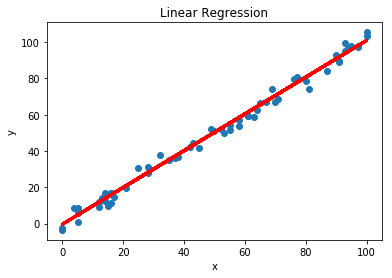

In [20]:
#Model Regression line on test set
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')

Text(0,0.5,'Residual')

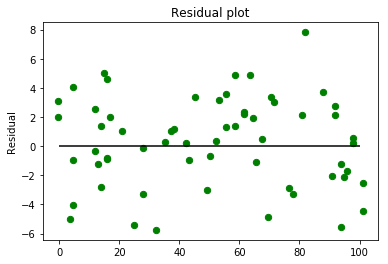

In [21]:
#Residual plot
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')